In [ ]:
# Step 1: Upload and Extract ZIP
from google.colab import files

uploaded = files.upload()  # This opens a dialog to upload your file


Saving iuss-23-24-automatic-diagnosis-breast-cancer.zip to iuss-23-24-automatic-diagnosis-breast-cancer.zip


In [ ]:
# Step 2: Load Training Images from Folders
import zipfile
import os

zip_path = "iuss-23-24-automatic-diagnosis-breast-cancer.zip"
extract_dir = "/content/breast_cancer_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List extracted files
os.listdir(extract_dir)


['complete_set', 'training_set']

In [ ]:
# Step 2: Load Training Images from Folders
import tensorflow as tf

train_dir = extract_dir + "/training_set" # Corrected variable name

# Load and label images automatically
img_height, img_width = 180, 180
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Classes:", class_names)

Found 1112 files belonging to 2 classes.
Classes: ['benign', 'malignant']


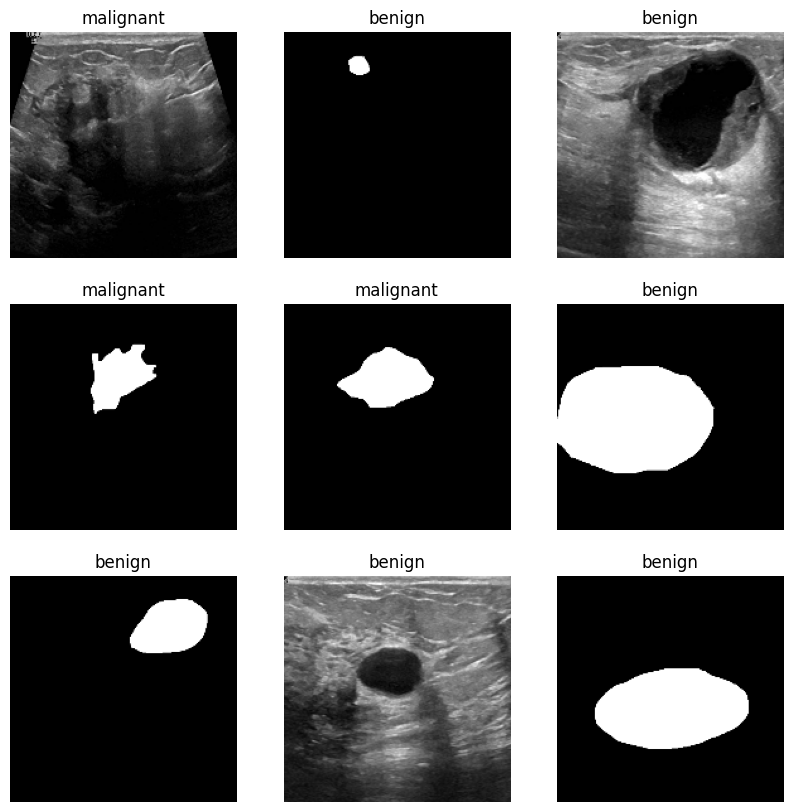

In [ ]:
#  Step 3: Visualize a Few Samples
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")




In [ ]:
# Step 4: Build and Train a CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_ds, epochs=5)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.6330 - loss: 1.0302
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.7522 - loss: 0.5055
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.8533 - loss: 0.3312
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9245 - loss: 0.1833
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9742 - loss: 0.0859


In [ ]:
# Step 5: Evaluate Model
from sklearn.metrics import classification_report, f1_score

# Convert test dataset to numpy
y_true = []
y_pred = []

for images, labels in train_ds:
    preds = model.predict(images).flatten()
    preds = (preds > 0.5).astype("int")
    y_true.extend(labels.numpy())
    y_pred.extend(preds)

# Metrics
print("F1 Score:", f1_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 